In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px

In [66]:
dld_raw = pd.read_csv(r'../data/Transactions.csv')

In [67]:
dld_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 978696 entries, 0 to 978695
Data columns (total 46 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   transaction_id        978696 non-null  object 
 1   procedure_id          978696 non-null  int64  
 2   trans_group_id        978696 non-null  int64  
 3   trans_group_ar        978696 non-null  object 
 4   trans_group_en        978696 non-null  object 
 5   procedure_name_ar     978696 non-null  object 
 6   procedure_name_en     978696 non-null  object 
 7   instance_date         978690 non-null  object 
 8   property_type_id      978696 non-null  int64  
 9   property_type_ar      978696 non-null  object 
 10  property_type_en      978696 non-null  object 
 11  property_sub_type_id  749056 non-null  float64
 12  property_sub_type_ar  749056 non-null  object 
 13  property_sub_type_en  749056 non-null  object 
 14  property_usage_ar     978696 non-null  object 
 15  

In [6]:
dld_raw.nunique()

transaction_id          978696
procedure_id                51
trans_group_id               3
trans_group_ar               3
trans_group_en               3
procedure_name_ar           51
procedure_name_en           51
instance_date             6802
property_type_id             4
property_type_ar             4
property_type_en             4
property_sub_type_id        17
property_sub_type_ar        17
property_sub_type_en        17
property_usage_ar           11
property_usage_en           11
reg_type_id                  2
reg_type_ar                  2
reg_type_en                  2
area_id                    252
area_name_ar               251
area_name_en               251
building_name_ar          3215
building_name_en          3207
project_number            1830
project_name_ar           1824
project_name_en           1821
master_project_en          166
master_project_ar          165
nearest_landmark_ar         14
nearest_landmark_en         14
nearest_metro_ar            56
nearest_

In [7]:
dld_raw.columns

Index(['transaction_id', 'procedure_id', 'trans_group_id', 'trans_group_ar',
       'trans_group_en', 'procedure_name_ar', 'procedure_name_en',
       'instance_date', 'property_type_id', 'property_type_ar',
       'property_type_en', 'property_sub_type_id', 'property_sub_type_ar',
       'property_sub_type_en', 'property_usage_ar', 'property_usage_en',
       'reg_type_id', 'reg_type_ar', 'reg_type_en', 'area_id', 'area_name_ar',
       'area_name_en', 'building_name_ar', 'building_name_en',
       'project_number', 'project_name_ar', 'project_name_en',
       'master_project_en', 'master_project_ar', 'nearest_landmark_ar',
       'nearest_landmark_en', 'nearest_metro_ar', 'nearest_metro_en',
       'nearest_mall_ar', 'nearest_mall_en', 'rooms_ar', 'rooms_en',
       'has_parking', 'procedure_area', 'actual_worth', 'meter_sale_price',
       'rent_value', 'meter_rent_price', 'no_of_parties_role_1',
       'no_of_parties_role_2', 'no_of_parties_role_3'],
      dtype='object')

In [76]:
dld_raw['rooms_en'].unique()

array([nan, 'أربع غرف', 'ثلاث غرف', 'غرفتين', 'خمس غرف', 'ست غرف', 'غرفة',
       'استوديو', 'PENTHOUSE', 'محل', 'مكتب', 'غرفة مستقلة', 'مخزن',
       'سبع غرف', 'GYM', 'ثمان غرف'], dtype=object)

In [70]:
category_columns = (
    'procedure_id', 'trans_group_id', 'trans_group_ar',
    'trans_group_en', 'procedure_name_ar', 'procedure_name_en',
    'property_type_id', 'property_type_ar',
    'property_type_en', 'property_sub_type_id', 'property_sub_type_ar',
    'property_sub_type_en', 'property_usage_ar', 'property_usage_en',
    'reg_type_id', 'reg_type_ar', 'reg_type_en', 'area_id', 'area_name_ar',
    'area_name_en', 'master_project_en', 'master_project_ar', 'nearest_landmark_ar',
    'nearest_landmark_en', 'nearest_metro_ar', 'nearest_metro_en',
    'nearest_mall_ar', 'nearest_mall_en', 'rooms_ar', 'rooms_en',
)

room_arr = pd.read_csv("../data/map.csv").values
rooms_map = dict()
for i in range(len(room_arr)):
    rooms_map[room_arr[i][0]] = room_arr[i][1]


rooms_cat = ['studio', 'one_bedroom', 'two_bedroom', 'three_bedroom', 'four_bedroom',
             'five_bedroom', 'six_bedroom', 'seven_bedroom', 'eight_bedroom', 'penthouse',
             'shop', 'office', 'store', 'gym', 'room']

In [61]:
dld = (
    dld_raw
    .astype({col:'category' for col in category_columns})
    .astype({'has_parking':bool})
    .assign(instance_date = lambda x: pd.to_datetime(x['instance_date'], format="%d-%m-%Y"))
    .pipe(lambda x: x.drop(x.filter(regex="_ar|_id", axis=1).columns, axis=1))
    .assign(
        instance_year = lambda x: x['instance_date'].dt.year,
        instance_month = lambda x: x['instance_date'].dt.month,
        rooms_en = lambda x: pd.Categorical(x['rooms_en'].map(rooms_map), categories=rooms_cat),
    )
    .drop(['project_number'], axis=1)
)
dld.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 978696 entries, 0 to 978695
Data columns (total 25 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   trans_group_en        978696 non-null  category      
 1   procedure_name_en     978696 non-null  category      
 2   instance_date         978690 non-null  datetime64[ns]
 3   property_type_en      978696 non-null  category      
 4   property_sub_type_en  749056 non-null  category      
 5   property_usage_en     978696 non-null  category      
 6   reg_type_en           978696 non-null  category      
 7   area_name_en          978696 non-null  category      
 8   building_name_en      669718 non-null  object        
 9   project_name_en       601557 non-null  object        
 10  master_project_en     797009 non-null  category      
 11  nearest_landmark_en   871092 non-null  category      
 12  nearest_metro_en      764965 non-null  category      
 13 

In [78]:
dld['rooms_en'].value_counts()

one_bedroom      239027
two_bedroom      172337
studio           125562
three_bedroom    100394
office            56742
four_bedroom      30059
shop              11559
five_bedroom       3929
penthouse          1655
room                769
six_bedroom         573
store               323
seven_bedroom        28
gym                  17
eight_bedroom         4
Name: rooms_en, dtype: int64

# Univariate Analysis

## categoricals

trans_group_en



count     978696
unique         3
top        Sales
freq      731896
Name: trans_group_en, dtype: object

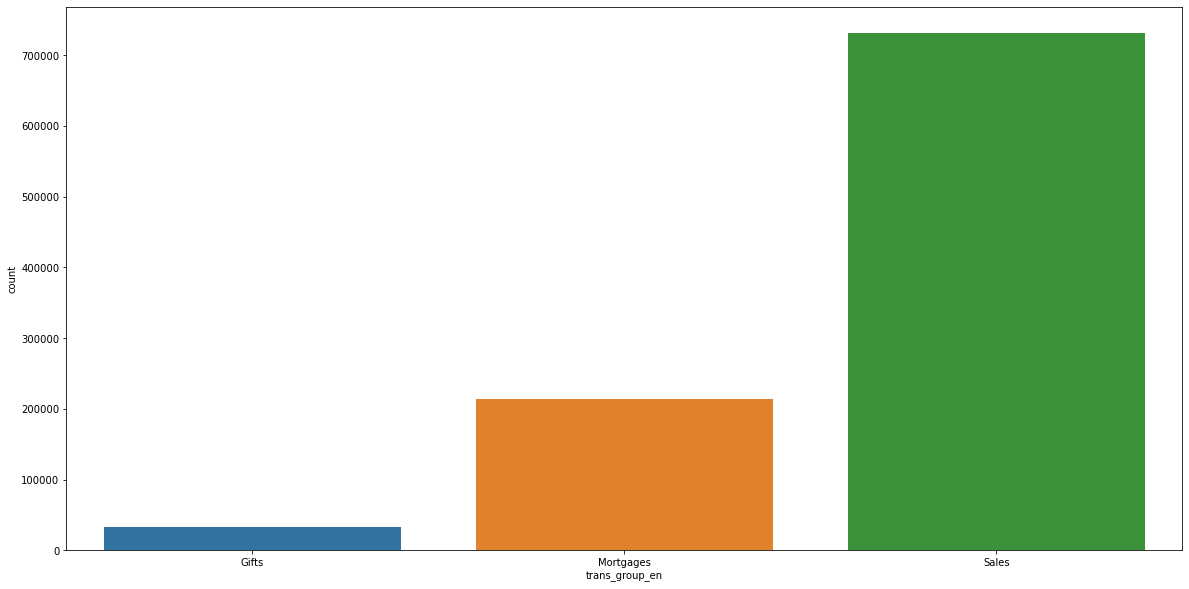

procedure_name_en



count     978696
unique        51
top         Sell
freq      329667
Name: procedure_name_en, dtype: object

property_type_en



count     978696
unique         4
top         Unit
freq      669718
Name: property_type_en, dtype: object

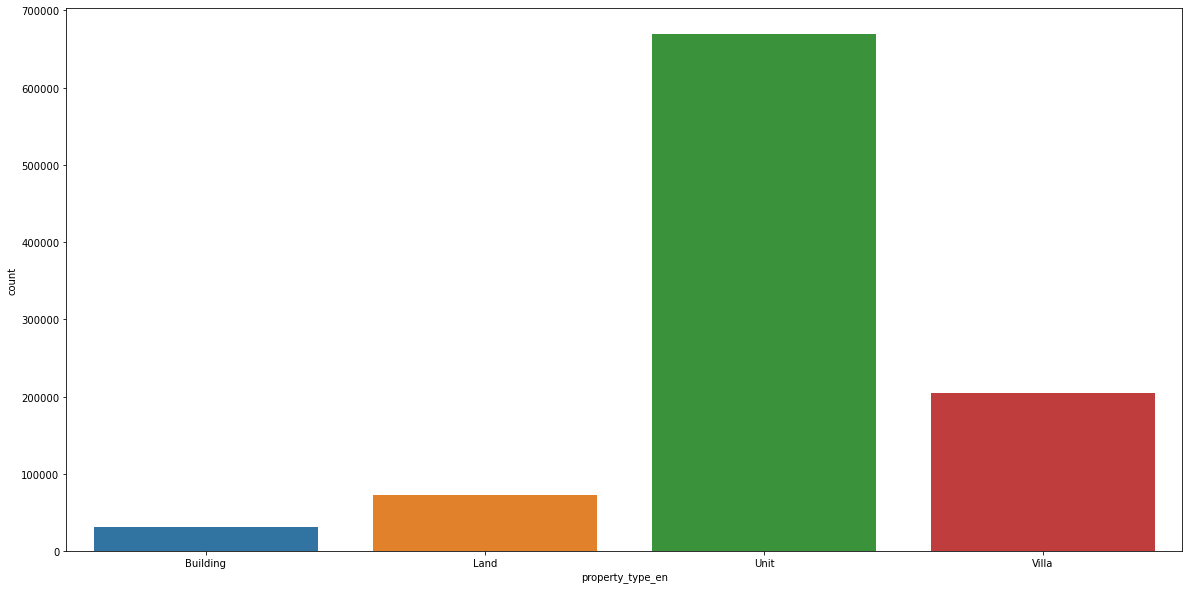

property_sub_type_en



count     749056
unique        17
top         Flat
freq      566713
Name: property_sub_type_en, dtype: object

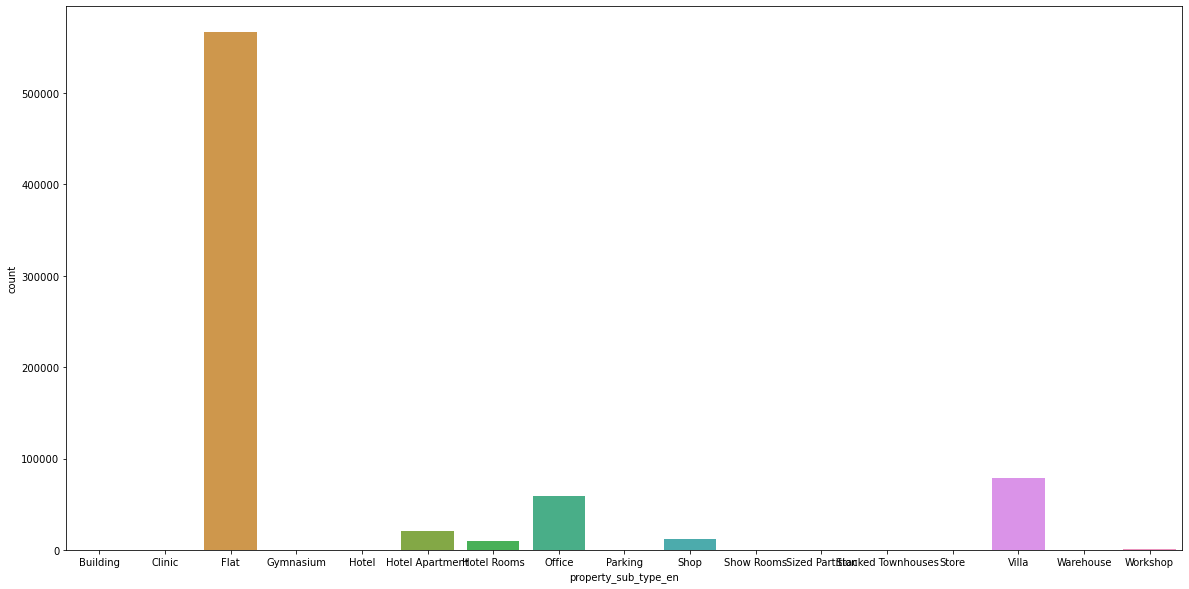

property_usage_en



count          978696
unique             11
top       Residential
freq           816161
Name: property_usage_en, dtype: object

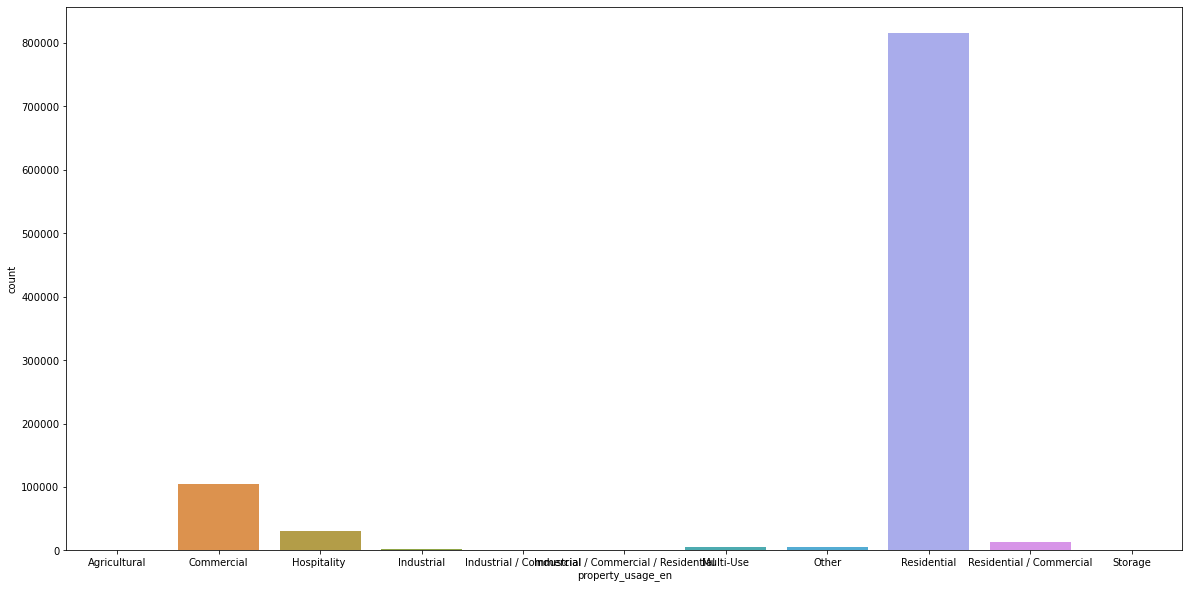

reg_type_en



count                  978696
unique                      2
top       Existing Properties
freq                   698409
Name: reg_type_en, dtype: object

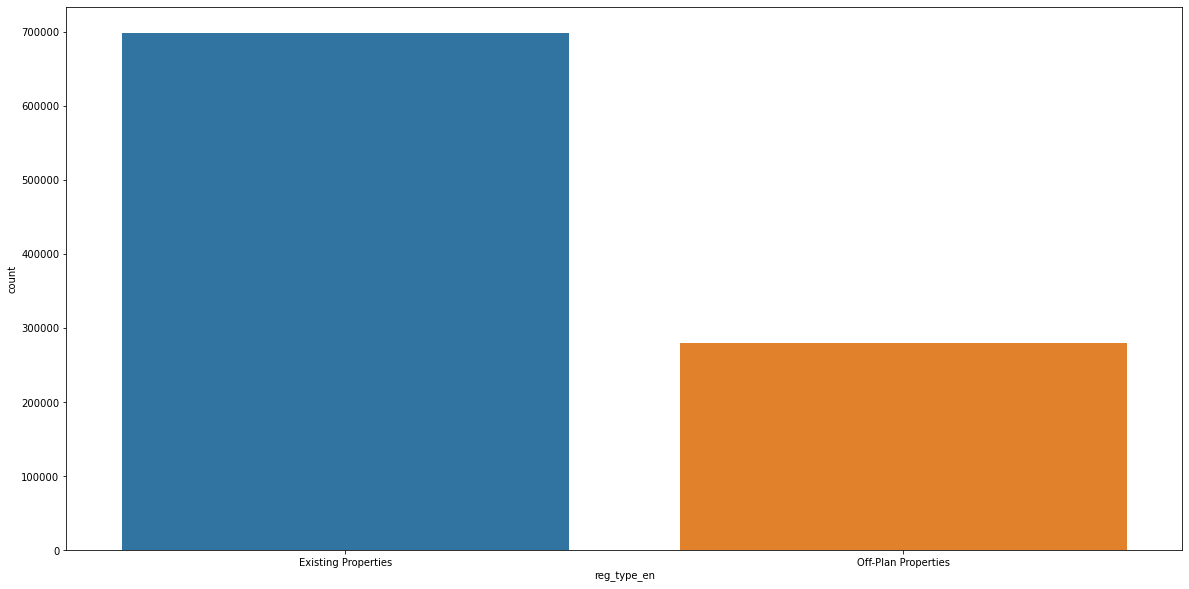

area_name_en



count          978696
unique            251
top       Marsa Dubai
freq            99918
Name: area_name_en, dtype: object

master_project_en



count           797009
unique             166
top       Dubai Marina
freq             71358
Name: master_project_en, dtype: object

nearest_landmark_en



count                           871092
unique                              14
top       Sports City Swimming Academy
freq                            222591
Name: nearest_landmark_en, dtype: object

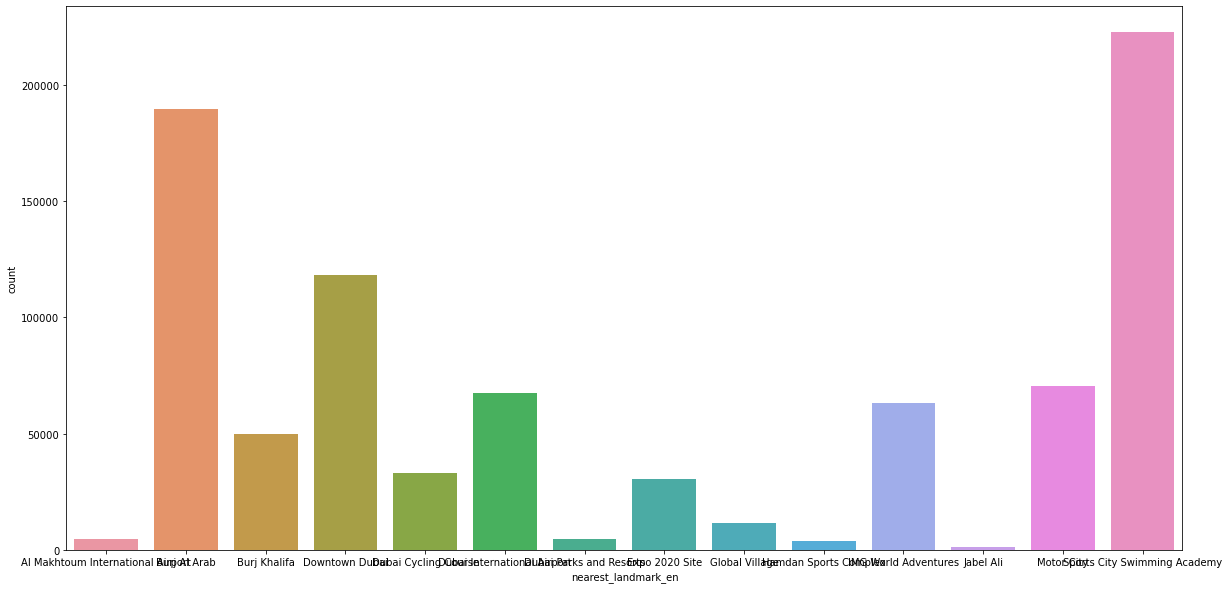

nearest_metro_en



count                                   764965
unique                                      56
top       Buj Khalifa Dubai Mall Metro Station
freq                                     78336
Name: nearest_metro_en, dtype: object

nearest_mall_en



count          759914
unique              5
top       Marina Mall
freq           331963
Name: nearest_mall_en, dtype: object

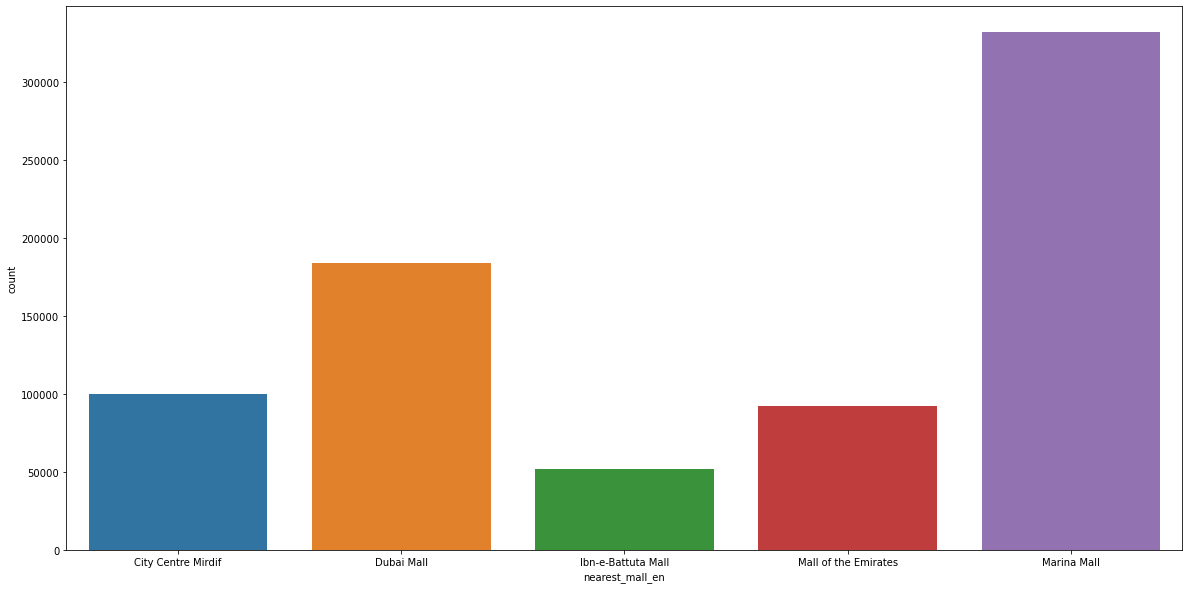

rooms_en



count          742978
unique             15
top       one_bedroom
freq           239027
Name: rooms_en, dtype: object

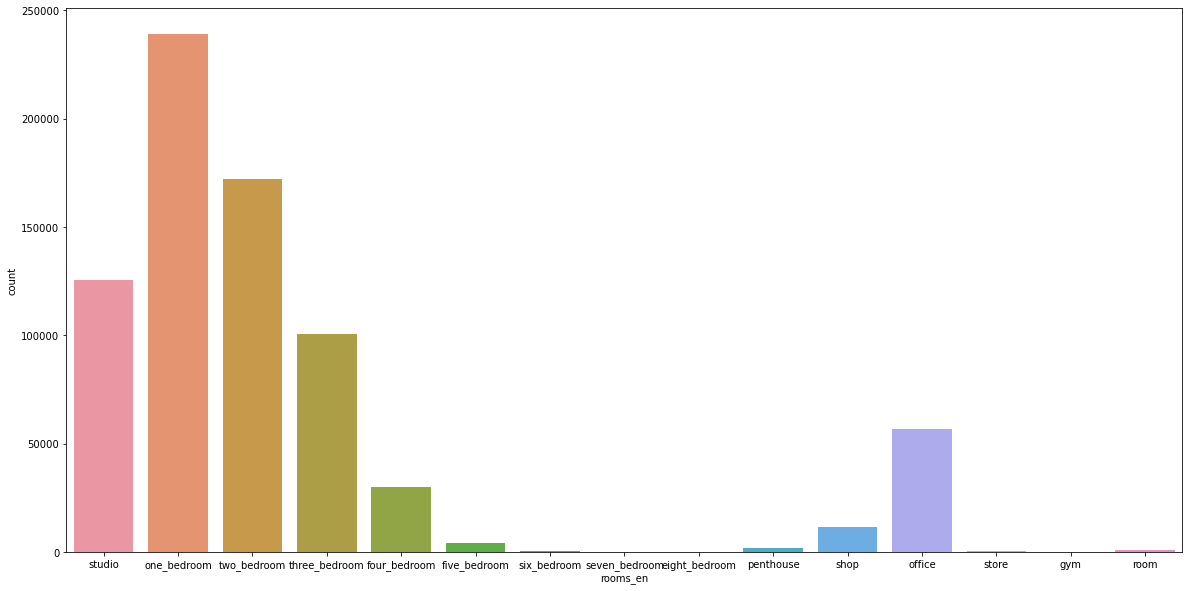

In [79]:
for col in dld.select_dtypes('category'):
    print("="*100)
    print(col)
    print()
    
    display(dld[col].describe())
    
    if dld[col].nunique() < 20:
        fig, ax = plt.subplots(figsize=(20,10))
        sns.countplot(data=dld, x=col, ax=ax)
        plt.show()


## Numeric

actual_worth


count    9.750920e+05
mean     2.539201e+06
std      5.993720e+06
min      1.000000e+00
25%      6.750000e+05
50%      1.223600e+06
75%      2.248155e+06
max      9.990187e+07
Name: actual_worth, dtype: float64

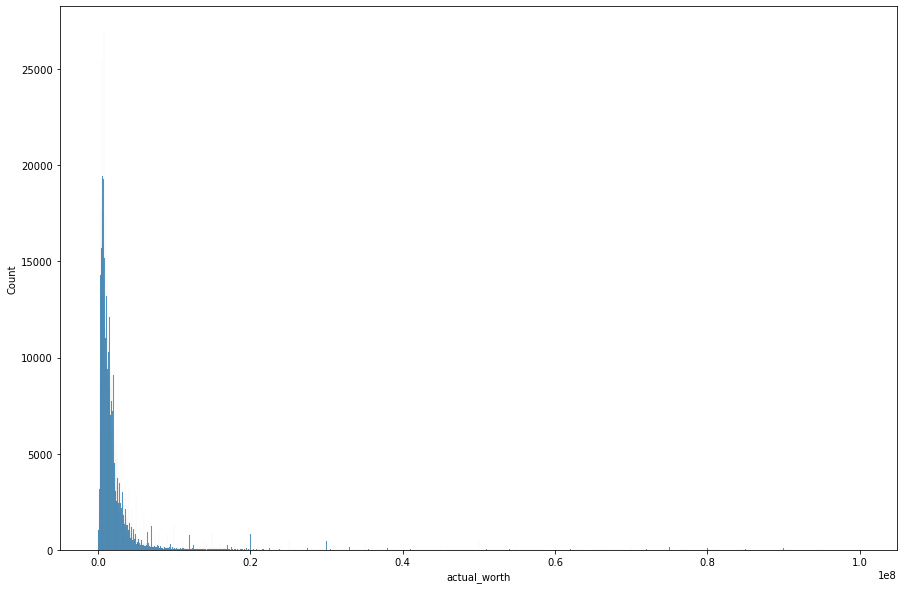

meter_sale_price


count    9.786960e+05
mean     1.318906e+04
std      1.179263e+05
min      0.000000e+00
25%      6.079120e+03
50%      9.149330e+03
75%      1.369785e+04
max      2.181199e+07
Name: meter_sale_price, dtype: float64

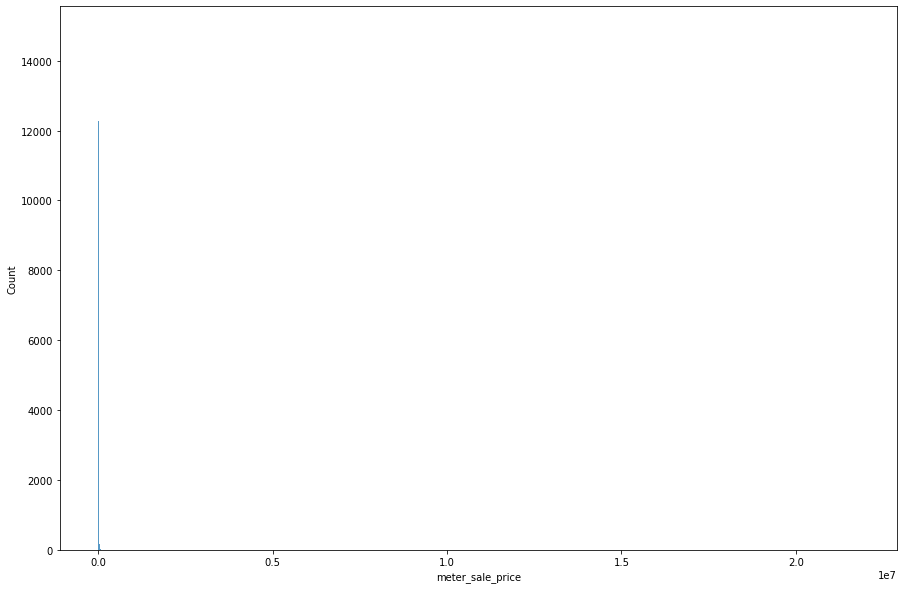

rent_value


count    3.405200e+04
mean     1.412126e+06
std      1.728923e+06
min      2.000000e+00
25%      5.984930e+05
50%      1.000000e+06
75%      1.755000e+06
max      8.500000e+07
Name: rent_value, dtype: float64

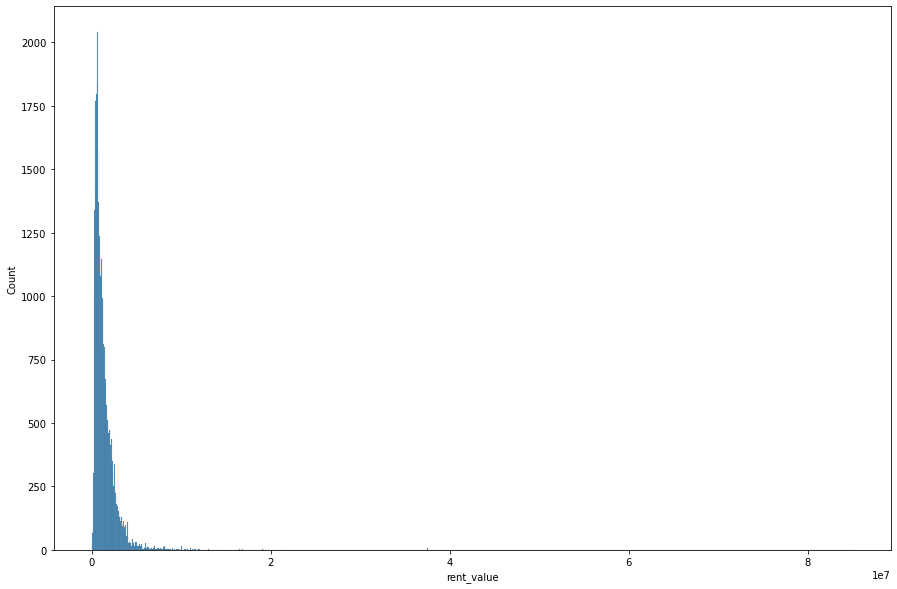

meter_rent_price


count    3.405500e+04
mean     2.111016e+04
std      2.944686e+05
min      0.000000e+00
25%      4.930000e+03
50%      7.145000e+03
75%      1.006350e+04
max      1.109416e+07
Name: meter_rent_price, dtype: float64

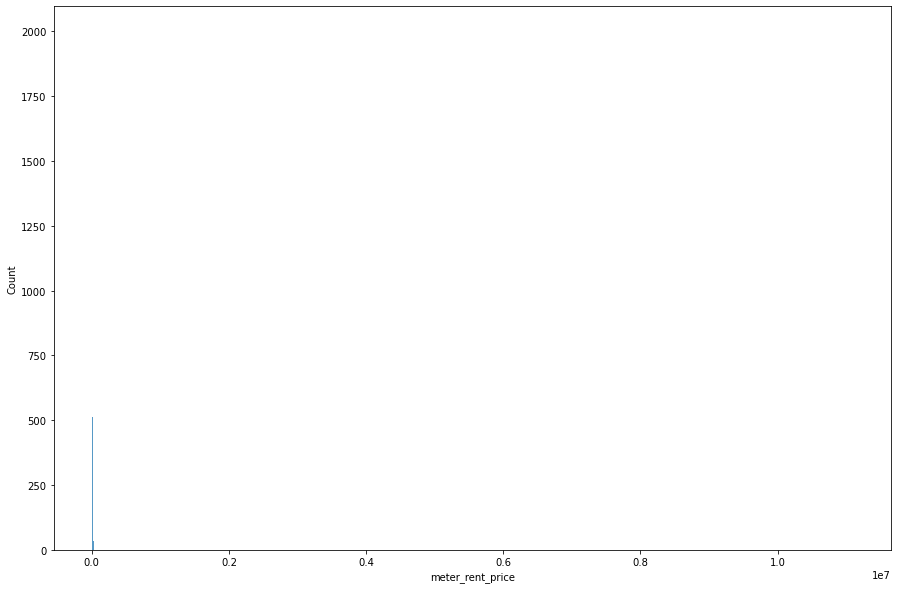

no_of_parties_role_1


count    977528.000000
mean          1.291320
std           3.242079
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max         703.000000
Name: no_of_parties_role_1, dtype: float64

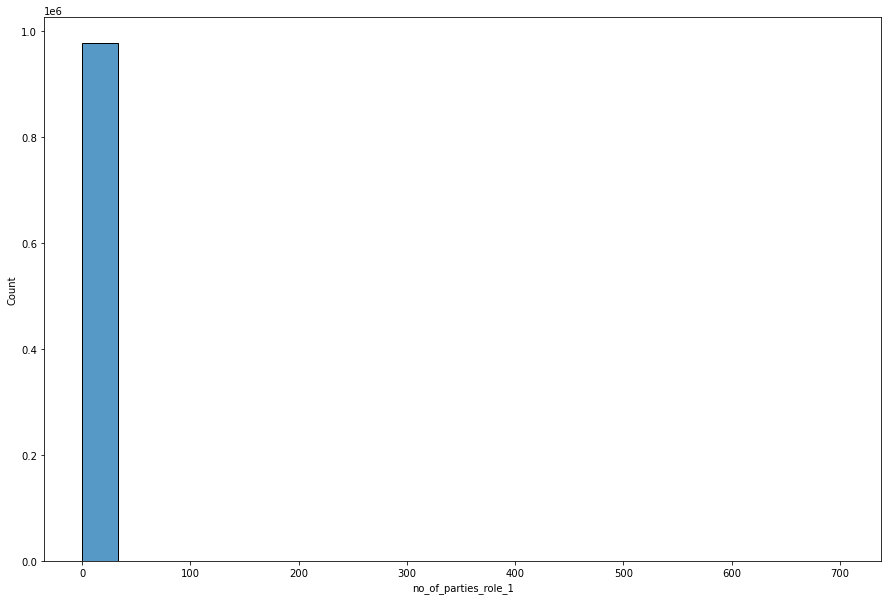

no_of_parties_role_2


count    977528.000000
mean          1.197176
std           0.524005
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max          51.000000
Name: no_of_parties_role_2, dtype: float64

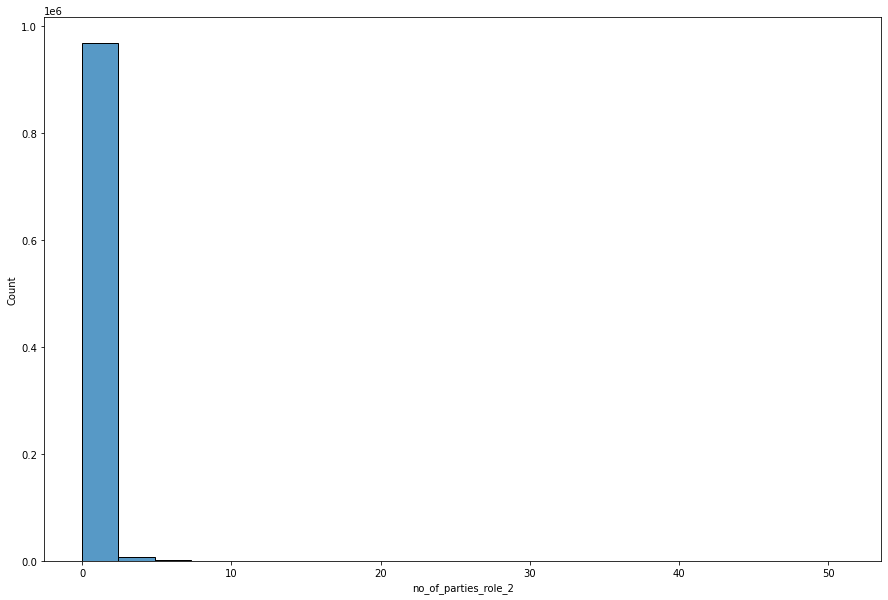

no_of_parties_role_3


count    977528.000000
mean          0.165531
std           0.642025
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          17.000000
Name: no_of_parties_role_3, dtype: float64

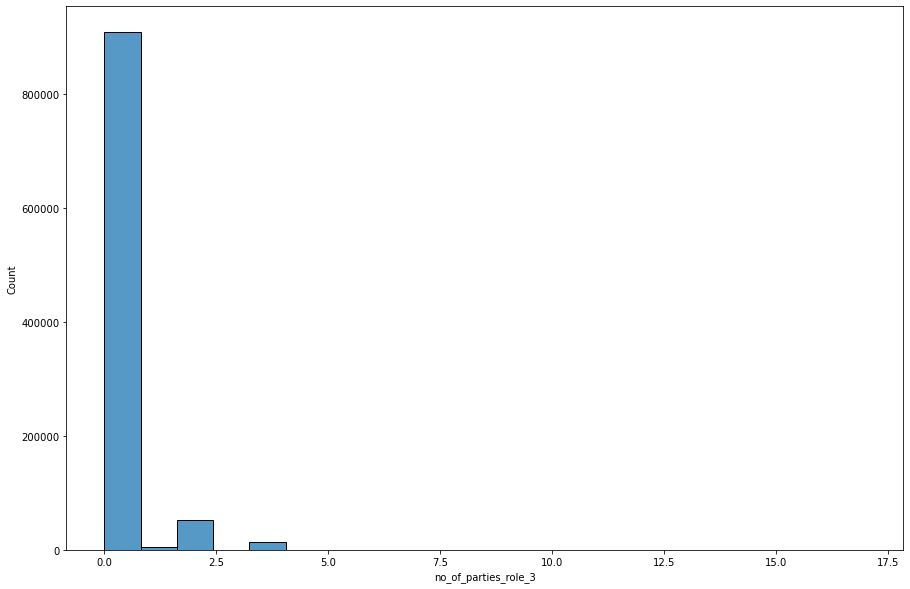

instance_year


count    978690.000000
mean       2014.694302
std           4.952206
min        1995.000000
25%        2011.000000
50%        2015.000000
75%        2019.000000
max        2022.000000
Name: instance_year, dtype: float64

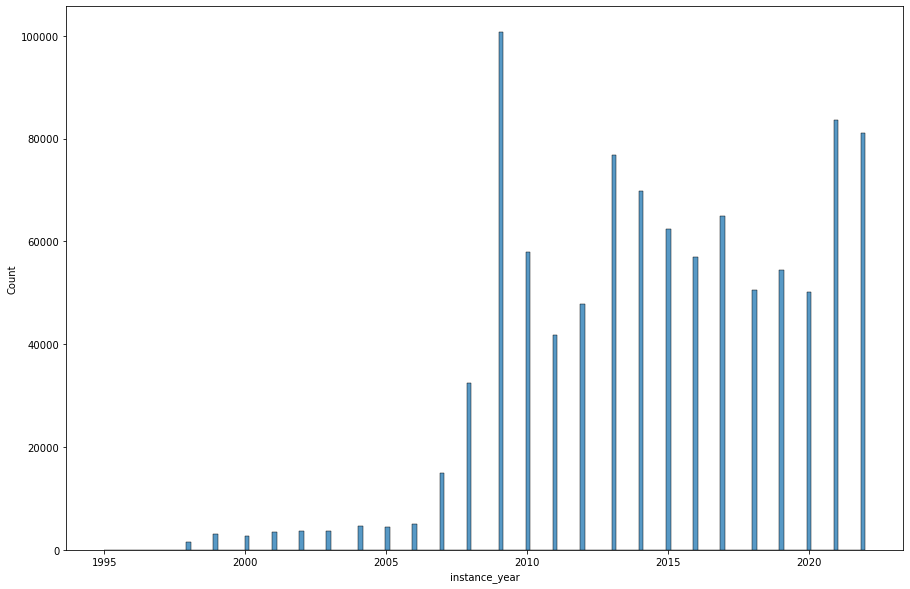

instance_month


count    978690.000000
mean          6.434399
std           3.367592
min           1.000000
25%           4.000000
50%           6.000000
75%           9.000000
max          12.000000
Name: instance_month, dtype: float64

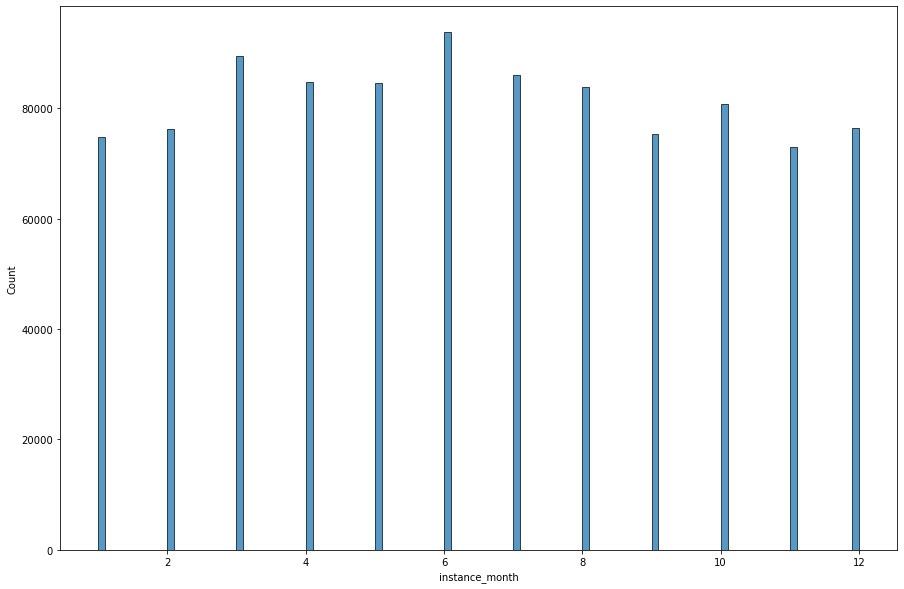

In [83]:
for col in dld.select_dtypes('number'):
    print("="*100)
    print(col)
    display(dld[col].describe())
    fig, ax = plt.subplots(figsize=(15,10))
    sns.histplot(data=dld, x=col, ax=ax)
    plt.show()

# Breakdown per transaction group

In [15]:
(dld[['trans_group_en', 'instance_year']]
.value_counts(dropna=False).unstack(level='trans_group_en')
.reset_index()
.pipe(lambda x: x.set_axis(x.columns.values, axis=1))
.assign(instance_year = lambda x: x['instance_year'].fillna(-1).astype(int).astype(str).replace({'-1':'missing'}))
.astype({'instance_year':'str'})
.fillna(0)
)

,instance_year,Gifts,Mortgages,Sales
0,1995,0.0,3.0,0.0
1,1996,0.0,2.0,0.0
2,1997,0.0,1.0,56.0
3,1998,0.0,135.0,1309.0
4,1999,3.0,2235.0,899.0
5,2000,95.0,1758.0,920.0
6,2001,287.0,1718.0,1440.0
7,2002,327.0,1481.0,1908.0
8,2003,305.0,1283.0,2071.0
9,2004,417.0,1401.0,2839.0


<AxesSubplot:xlabel='instance_year', ylabel='count'>

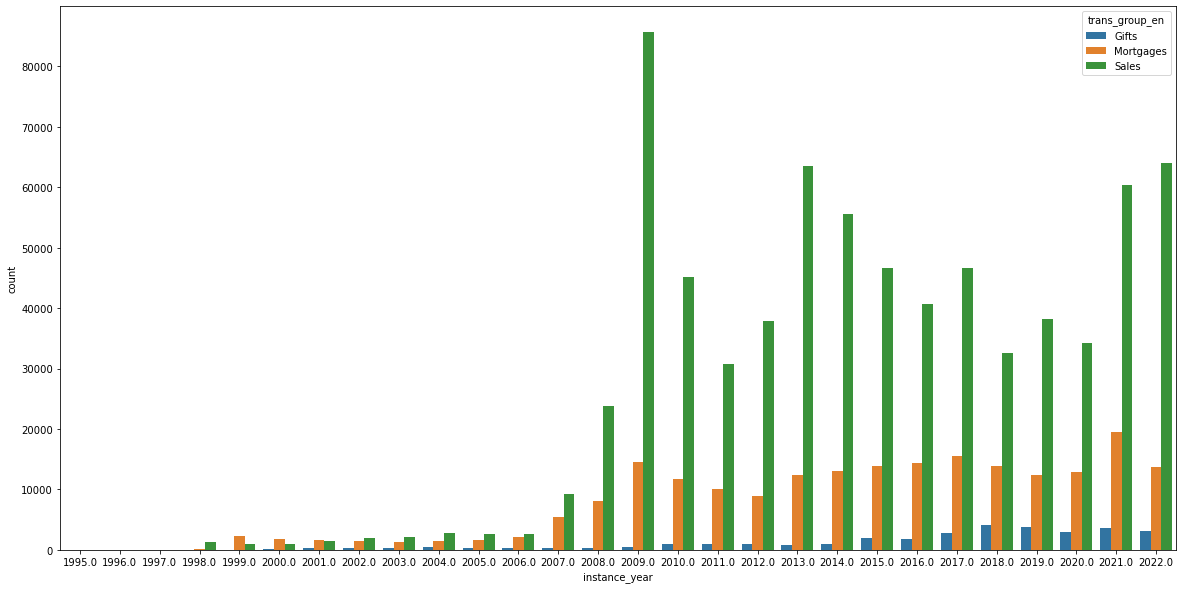

In [87]:
fig, ax = plt.subplots(figsize=(20,10))
sns.countplot(data=dld, x='instance_year', hue='trans_group_en')

# Breakdown per property type

<AxesSubplot:xlabel='actual_worth', ylabel='property_type_en'>

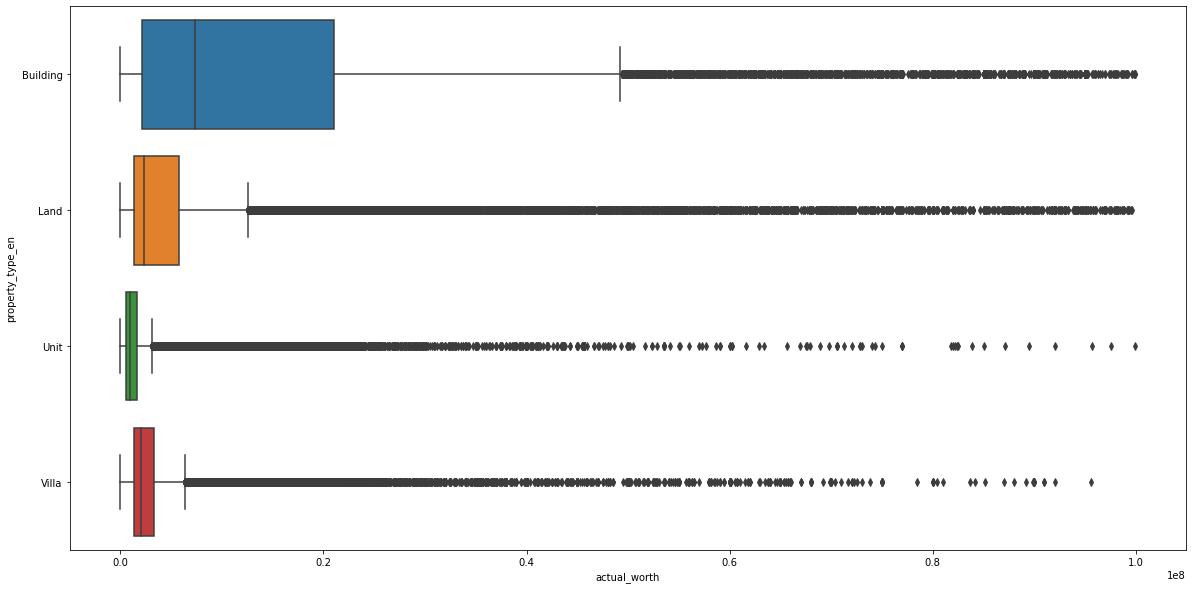

In [88]:
fig, ax = plt.subplots(figsize=(20,10))
sns.boxplot(data=dld, x='actual_worth', y='property_type_en')

# Subset

In [195]:
filters = ["trans_group_en == 'Sales'", "property_usage_en == 'Residential'", "property_type_en != 'Land'"]
query_string = " & ".join(filters)

select_columns = ["instance_date", "instance_year", "instance_month",
           "property_type_en", "reg_type_en", "area_name_en", "nearest_metro_en",
           "building_name_en", "rooms_en", "actual_worth", 
          ]

dld_sub = (dld
    .query(query_string)[select_columns]
    .reset_index(drop=True)
    .pipe(lambda x: x[x["actual_worth"] < x["actual_worth"].quantile(q=0.95)])
)

In [160]:
dld_sub.head()

,instance_date,instance_year,instance_month,property_type_en,reg_type_en,area_name_en,nearest_metro_en,building_name_en,rooms_en,actual_worth
0,2014-02-15,2014.0,2.0,Villa,Existing Properties,Al Bada,Emirates Towers Metro Station,NaN,NaN,2650000.0
1,1999-05-25,1999.0,5.0,Building,Existing Properties,Al Karama,ADCB Metro Station,NaN,NaN,1500000.0
2,2001-03-18,2001.0,3.0,Building,Existing Properties,Al Karama,ADCB Metro Station,NaN,NaN,850000.0
3,2007-01-11,2007.0,1.0,Villa,Existing Properties,Mirdif,Rashidiya Metro Station,NaN,NaN,4088150.0
4,2014-06-02,2014.0,6.0,Villa,Existing Properties,Mirdif,Rashidiya Metro Station,NaN,NaN,1500000.0


In [ ]:
plot_df = dld.groupby(["instance_year", "reg_type_en"], as_index=False)["actual_worth"].agg(sum)
    
px.line(
    data_frame=plot_df,
    x="instance_year",
    y="actual_worth",
    color="reg_type_en"
)

## Registration type By Year

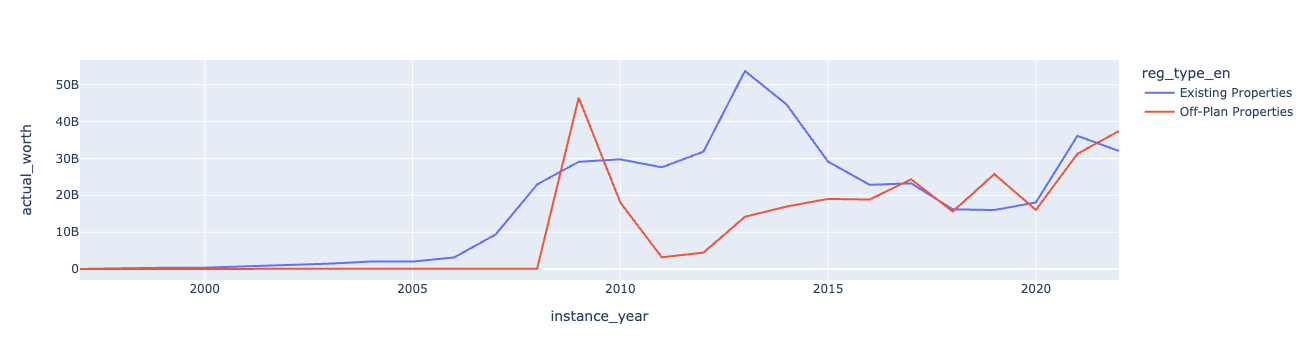

In [202]:
plot_df = dld_sub.groupby(["instance_year", "reg_type_en"], as_index=False)["actual_worth"].agg(sum)
    
px.line(
    data_frame=plot_df,
    x="instance_year",
    y="actual_worth",
    color="reg_type_en"
)

# Property Type By Year

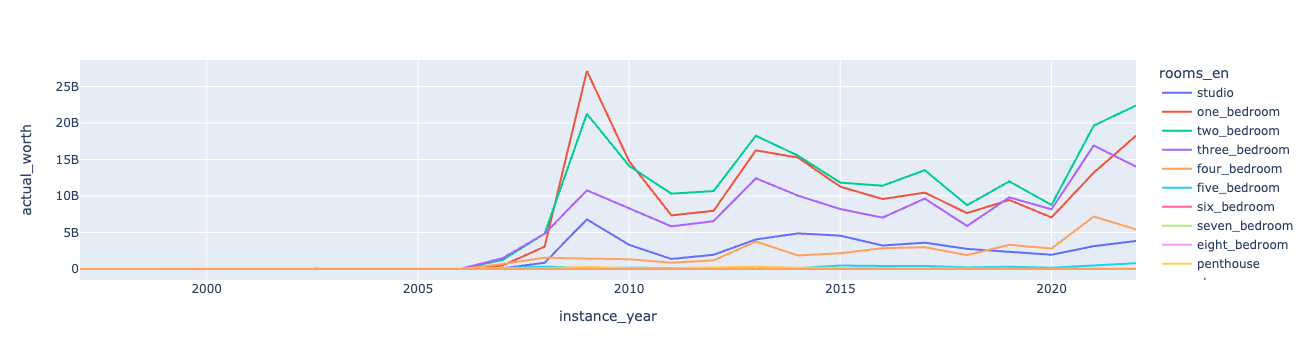

In [203]:
plot_df = dld_sub.groupby(["instance_year", "rooms_en"], as_index=False)["actual_worth"].agg(sum)
    
px.line(
    data_frame=plot_df,
    x="instance_year",
    y="actual_worth",
    color="rooms_en"
)

# Area transactions by year

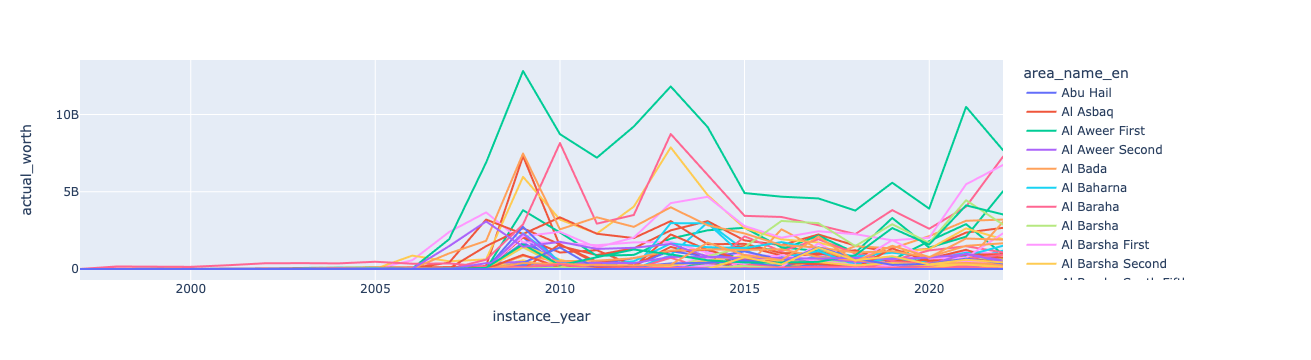

In [204]:
plot_df = dld_sub.groupby(["instance_year", "area_name_en"], as_index=False)["actual_worth"].agg(sum)
    
px.line(
    data_frame=plot_df,
    x="instance_year",
    y="actual_worth",
    color="area_name_en"
)

In [217]:
plot_df

,instance_year,area_name_en,actual_worth,flag
0,1997.0,Abu Hail,0.0,False
1,1997.0,Al Asbaq,0.0,False
2,1997.0,Al Aweer First,0.0,False
3,1997.0,Al Aweer Second,0.0,False
4,1997.0,Al Bada,0.0,False
...,...,...,...,...
6521,2022.0,Warsan Fourth,31625651.0,False
6522,2022.0,World Islands,0.0,False
6523,2022.0,Zaabeel First,4647000.0,False
6524,2022.0,Zaabeel Second,426757307.0,False


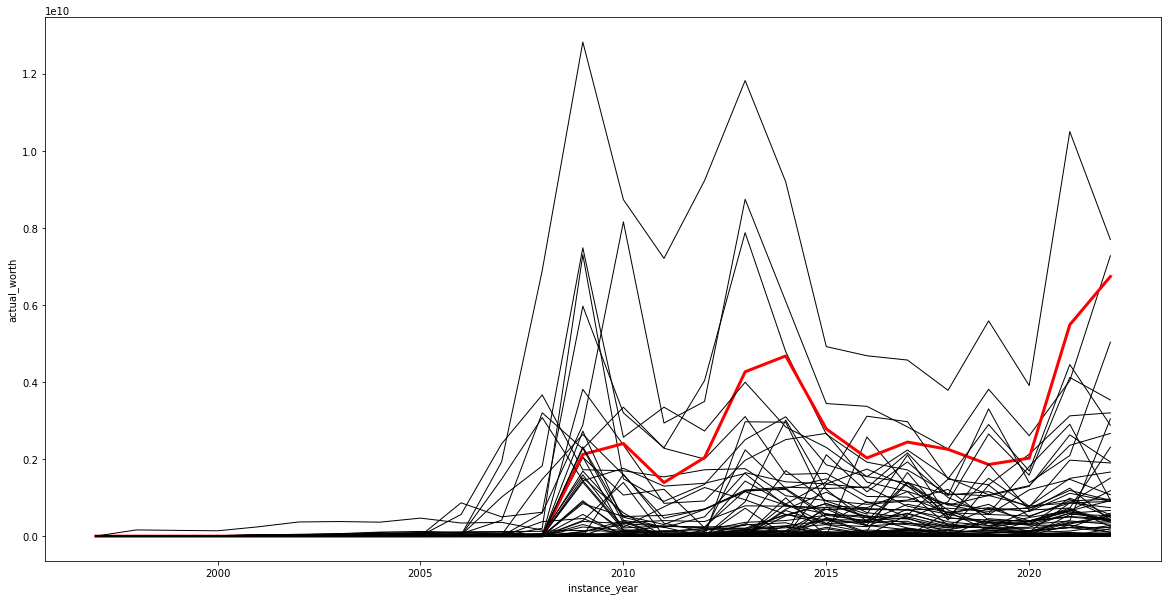

In [226]:
target = "Business Bay"
fig, ax = plt.subplots(figsize=(20,10))

plot_grp = (dld_sub
    .groupby(["instance_year", "area_name_en"], as_index=False)["actual_worth"].agg(sum)
    .assign(flag = lambda x: x["area_name_en"] == target)
    .groupby("area_name_en")
)

for grp, _df in plot_grp:
    color = "red" if grp == target else "black"
    linewidth = 3 if grp == target else 1
    sns.lineplot(data=_df, x="instance_year", y="actual_worth", color=color, linewidth = linewidth)



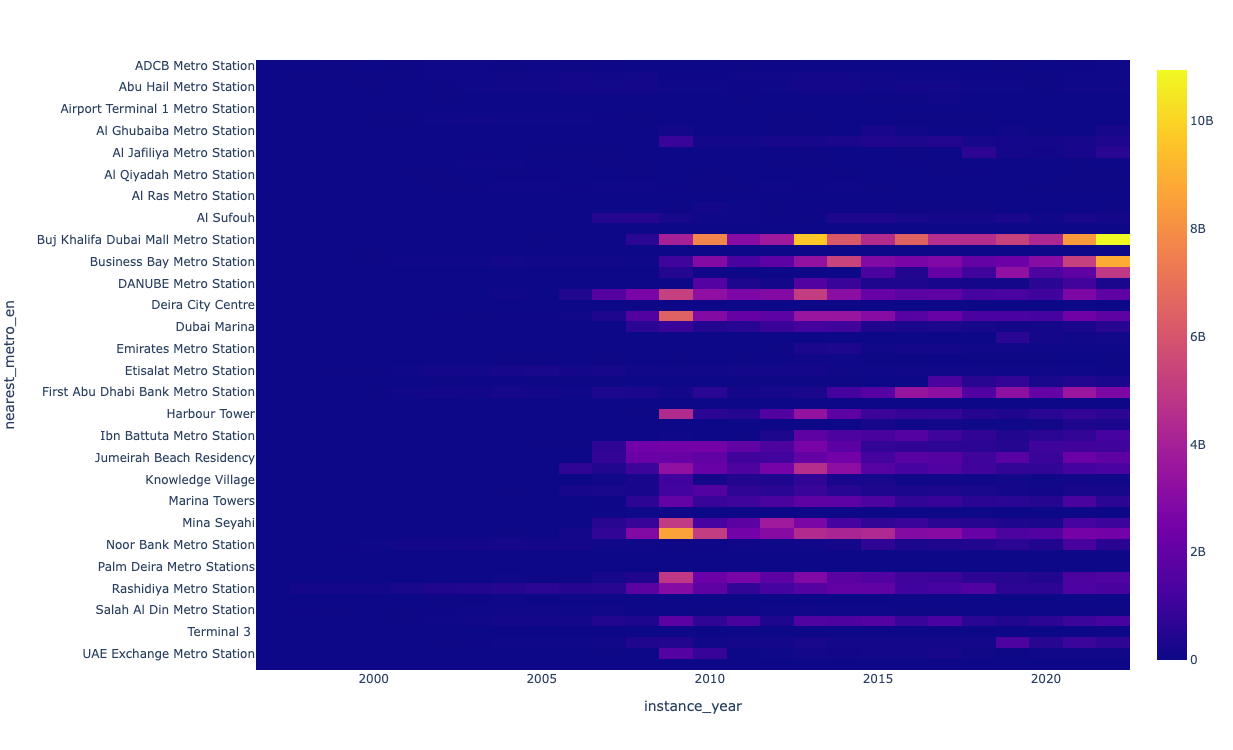

In [232]:
heatmap_df = (dld_sub
    .pivot_table(index="nearest_metro_en",
                 columns="instance_year",
                 values="actual_worth",
                 aggfunc=sum, fill_value=0
                )
)

px.imshow(heatmap_df, x=heatmap_df.columns, y=heatmap_df.index, height=750, width=1000)

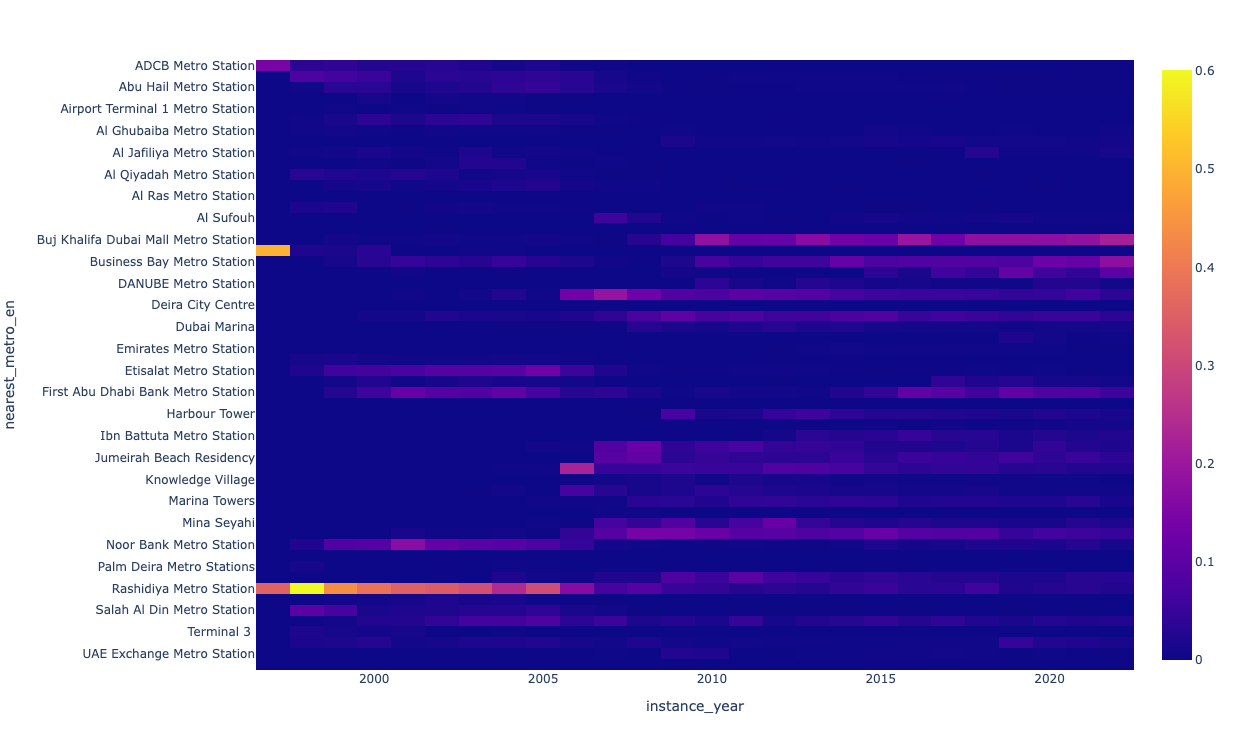

In [231]:
heatmap_df = (dld_sub
    .pivot_table(index="nearest_metro_en",
                 columns="instance_year",
                 values="actual_worth",
                 aggfunc=sum, fill_value=0
                )
    .pipe(lambda x: x / x.sum(axis=0))
)

px.imshow(heatmap_df, x=heatmap_df.columns, y=heatmap_df.index, height=750, width=1000)